# Analyzing Seattle Airbnb Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import math
%matplotlib inline

cal = pd.read_csv(r"C:\Users\May\Desktop\DS\Seattle\calendar.csv")
ls = pd.read_csv(r"C:\Users\May\Desktop\DS\Seattle\listings.csv")
rev = pd.read_csv(r"C:\Users\May\Desktop\DS\Seattle\reviews.csv")

At first, we need to explore the data to understand the data.

In [3]:
#Here we wanted to know how many rows and columns are in the data.
ls.shape

(3818, 92)

We can see that we have 92 columns and 3818 rows.

In [4]:
#Then we are displaying the first 5 rows of the data.
ls.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
#Now we want to get informations about each columns, their data types and missing values.
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

we can see some of the variables have data type floats, int and object.

In [6]:
#Now we want to display only the float data type from our data.
ls.dtypes[ls.dtypes=='float']

host_listings_count            float64
host_total_listings_count      float64
latitude                       float64
longitude                      float64
bathrooms                      float64
bedrooms                       float64
beds                           float64
square_feet                    float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
license                        float64
reviews_per_month              float64
dtype: object

In [7]:
#Then we want to display only the integer data type from our data.
ls.dtypes[ls.dtypes=='int64']

id                                int64
scrape_id                         int64
host_id                           int64
accommodates                      int64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
number_of_reviews                 int64
calculated_host_listings_count    int64
dtype: object

In [8]:
#And finally we want to display the object data type from our data.
pd.set_option('display.max_rows', 92)
ls.dtypes[ls.dtypes=='object']

listing_url                         object
last_scraped                        object
name                                object
summary                             object
space                               object
description                         object
experiences_offered                 object
neighborhood_overview               object
notes                               object
transit                             object
thumbnail_url                       object
medium_url                          object
picture_url                         object
xl_picture_url                      object
host_url                            object
host_name                           object
host_since                          object
host_location                       object
host_about                          object
host_response_time                  object
host_response_rate                  object
host_acceptance_rate                object
host_is_superhost                   object
host_thumbn

In [9]:
ls[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,$85.00,NaN,NaN,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00
2,$975.00,NaN,NaN,"$1,000.00",$300.00
3,$100.00,$650.00,"$2,300.00",NaN,NaN
4,$450.00,NaN,NaN,$700.00,$125.00
...,...,...,...,...,...
3813,$359.00,NaN,NaN,NaN,$230.00
3814,$79.00,NaN,NaN,$500.00,$50.00
3815,$93.00,$450.00,NaN,$250.00,$35.00
3816,$99.00,NaN,NaN,$300.00,$45.00


we can see that it doesn't make sense that the price variable and weekly_price, monthly_price, security_deposit, cleaning_fee have an object data type, so we need to convert them to float datatype.

# Data Cleaning

Converting a data type to another is part of the data cleaning process, now if we want to convert the data to float first we need to remove the dollar sign and the comma in out data.

In [10]:
ls['weekly_price'] = ls['weekly_price'].str.replace('$', '').str.replace(',','')

ls['monthly_price'] = ls['monthly_price'].str.replace('$', '').str.replace(',','')

ls['security_deposit'] = ls['security_deposit'].str.replace('$', '').str.replace(',','')

ls['cleaning_fee'] = ls['cleaning_fee'].str.replace('$', '').str.replace(',','')

ls['price'] = ls['price'].str.replace('$', '').str.replace(',','')

C:\Users\May\AppData\Local\Temp\ipykernel_42572\102581711.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ls['weekly_price'] = ls['weekly_price'].str.replace('$', '').str.replace(',','')
C:\Users\May\AppData\Local\Temp\ipykernel_42572\102581711.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ls['monthly_price'] = ls['monthly_price'].str.replace('$', '').str.replace(',','')
C:\Users\May\AppData\Local\Temp\ipykernel_42572\102581711.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ls['security_deposit'] = ls['sec

Now let's check if they're removed.

In [11]:
ls[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,85.00,NaN,NaN,NaN,NaN
1,150.00,1000.00,3000.00,100.00,40.00
2,975.00,NaN,NaN,1000.00,300.00
3,100.00,650.00,2300.00,NaN,NaN
4,450.00,NaN,NaN,700.00,125.00
...,...,...,...,...,...
3813,359.00,NaN,NaN,NaN,230.00
3814,79.00,NaN,NaN,500.00,50.00
3815,93.00,450.00,NaN,250.00,35.00
3816,99.00,NaN,NaN,300.00,45.00


Great, now can convert them to float.

In [12]:
ls['weekly_price']=ls['weekly_price'].astype(float)

ls['monthly_price']=ls['monthly_price'].astype(float)

ls['security_deposit'] = ls['security_deposit'].astype(float)

ls['cleaning_fee'] = ls['cleaning_fee'].astype(float)

ls['price']=ls['price'].astype(float)

Now we need to check if it has changed.

In [13]:
ls.dtypes[ls.dtypes=='float']

host_listings_count            float64
host_total_listings_count      float64
latitude                       float64
longitude                      float64
bathrooms                      float64
bedrooms                       float64
beds                           float64
square_feet                    float64
price                          float64
weekly_price                   float64
monthly_price                  float64
security_deposit               float64
cleaning_fee                   float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
license                        float64
reviews_per_month              float64
dtype: object

now we will check the correlation between the variables.

In [14]:
ls.corr()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
id,1.000000,NaN,0.546514,-0.023312,-0.023312,-0.016143,0.013360,-0.074279,-0.061821,-0.064113,...,0.039246,0.045355,0.068112,-0.004710,0.003389,0.105444,0.087858,NaN,-0.051348,0.091716
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.546514,NaN,1.000000,-0.069613,-0.069613,-0.024217,0.014749,-0.099620,-0.057076,-0.075722,...,0.027348,0.026768,0.047576,0.022116,0.025023,0.073277,0.078829,NaN,-0.176040,0.106389
host_listings_count,-0.023312,NaN,-0.069613,1.000000,1.000000,-0.012511,-0.000055,0.111210,0.068226,0.065931,...,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,NaN,0.224222,-0.117272
host_total_listings_count,-0.023312,NaN,-0.069613,1.000000,1.000000,-0.012511,-0.000055,0.111210,0.068226,0.065931,...,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,NaN,0.224222,-0.117272
latitude,-0.016143,NaN,-0.024217,-0.012511,-0.012511,1.000000,-0.155092,0.000335,-0.015003,0.039100,...,-0.038086,-0.015072,-0.038183,-0.018381,-0.025117,0.096746,-0.019488,NaN,0.026750,-0.084988
longitude,0.013360,NaN,0.014749,-0.000055,-0.000055,-0.155092,1.000000,-0.071584,-0.017041,-0.055045,...,-0.047121,-0.037005,-0.062576,-0.046990,-0.061539,-0.190567,-0.043979,NaN,0.086343,0.002583
accommodates,-0.074279,NaN,-0.099620,0.111210,0.111210,0.000335,-0.071584,1.000000,0.538439,0.770974,...,-0.013101,-0.049665,0.011646,-0.019664,-0.013208,-0.037520,-0.062041,NaN,-0.029525,-0.144150
bathrooms,-0.061821,NaN,-0.057076,0.068226,0.068226,-0.015003,-0.017041,0.538439,1.000000,0.610937,...,0.045101,-0.006129,0.018063,-0.002939,-0.016067,-0.008959,0.014297,NaN,-0.002731,-0.167894
bedrooms,-0.064113,NaN,-0.075722,0.065931,0.065931,0.039100,-0.055045,0.770974,0.610937,1.000000,...,0.023257,-0.011943,-0.008089,0.010509,0.001113,-0.028991,-0.001208,NaN,-0.045543,-0.230287


<AxesSubplot:>

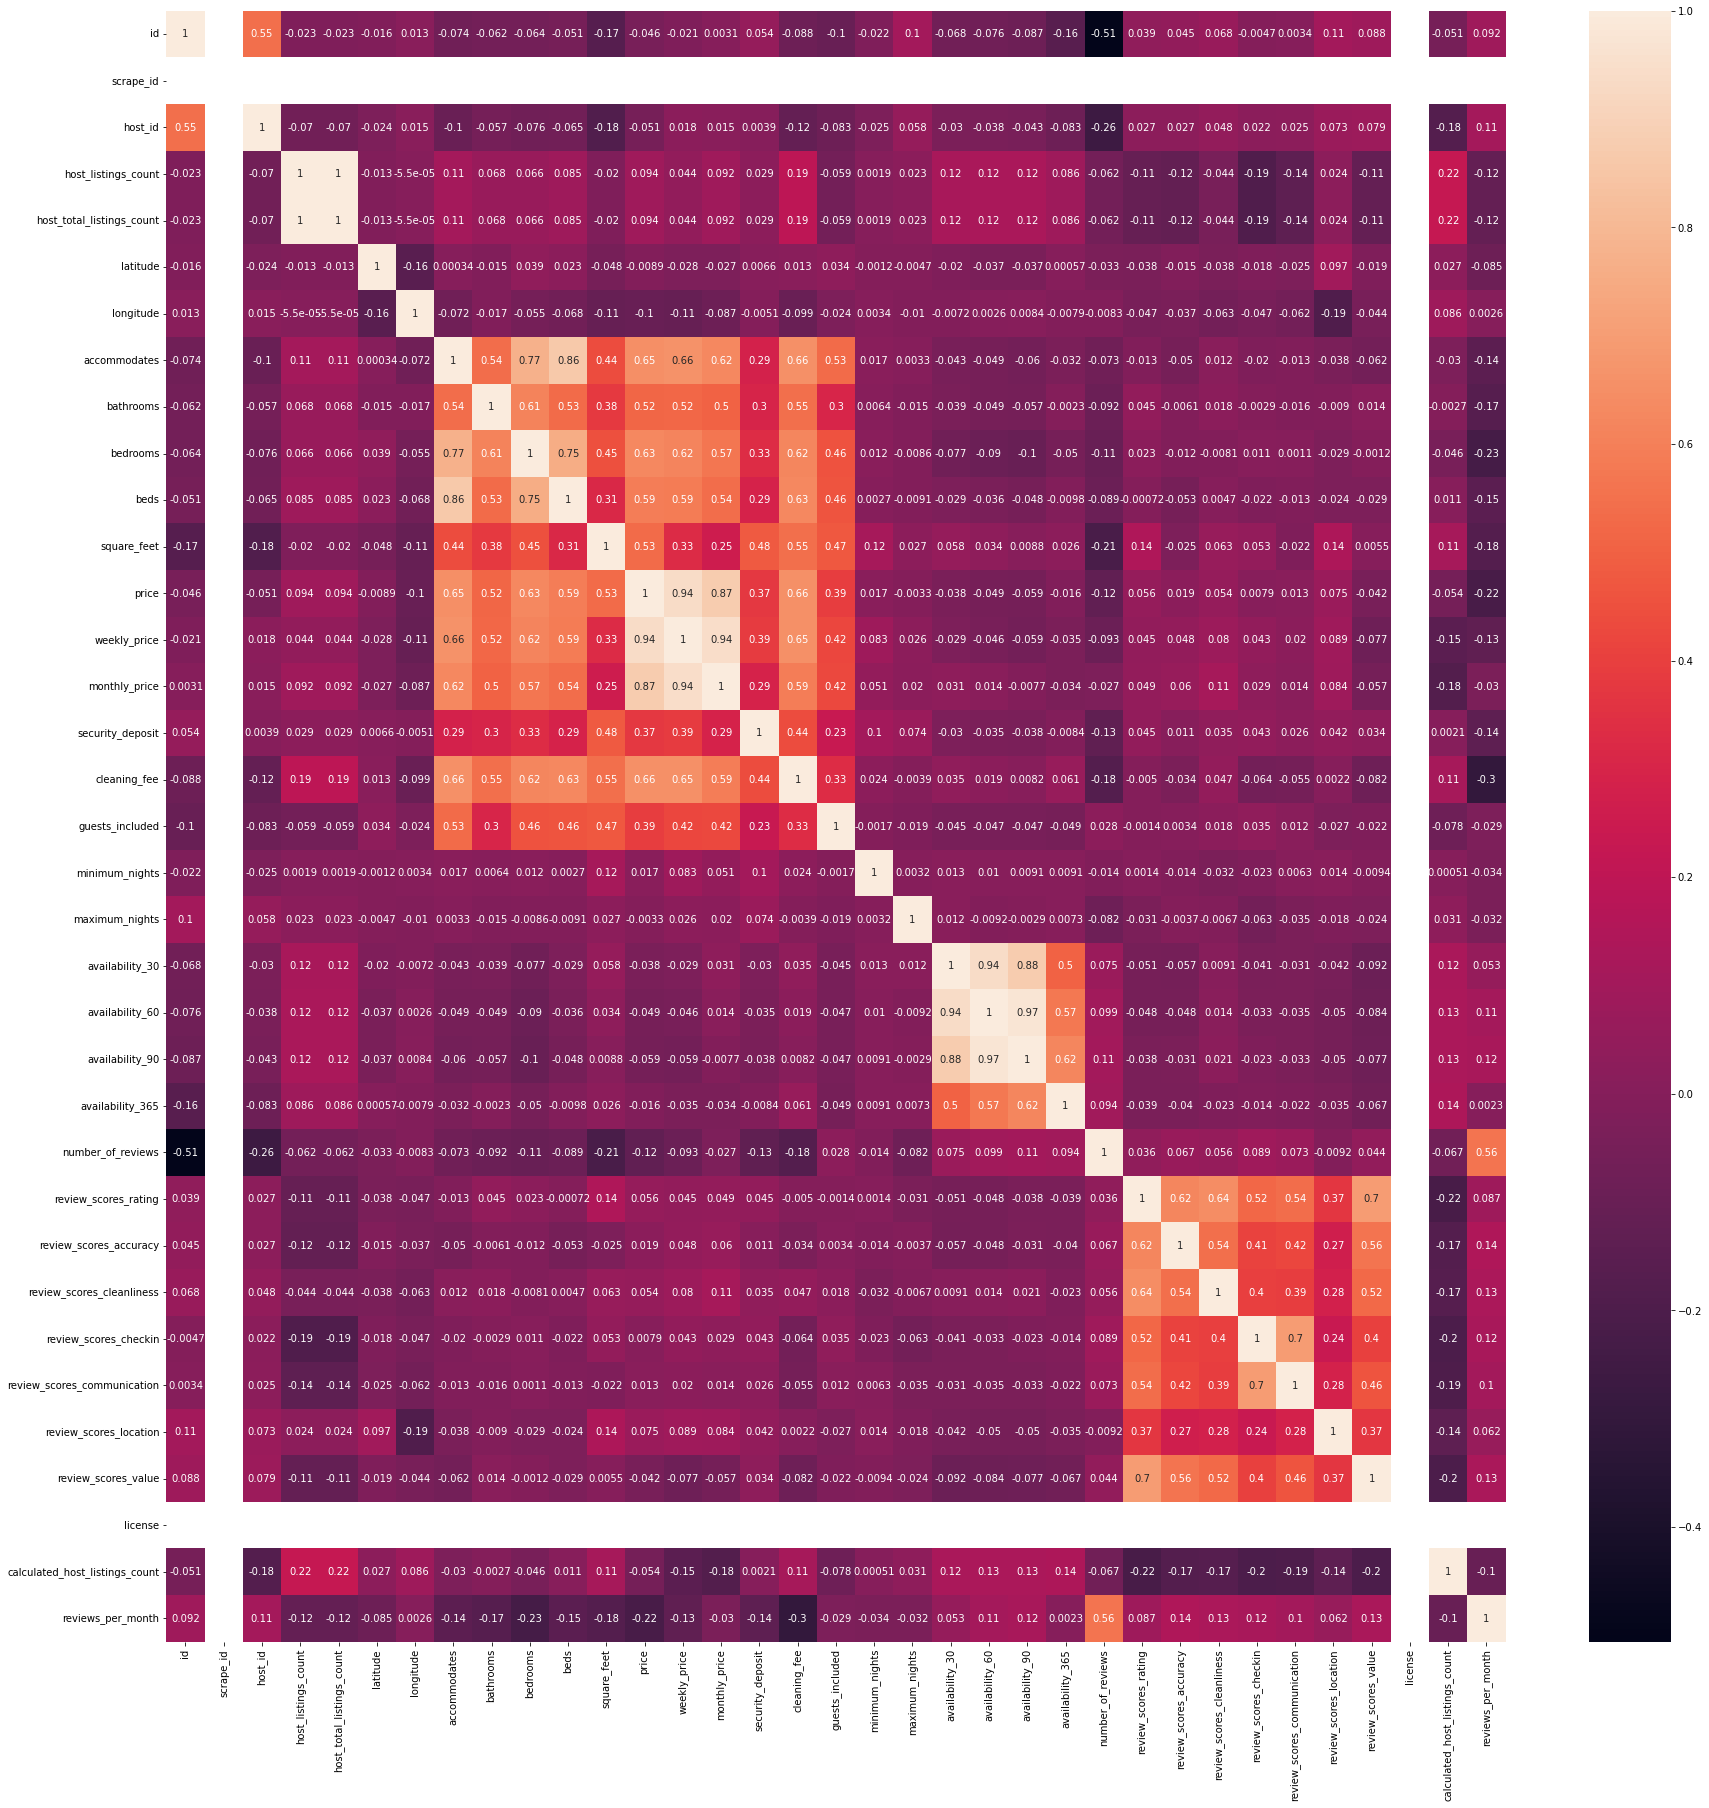

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(30,30))
sns.heatmap(ls.corr(),annot=True)

we can see that some of the variables are useless, and some of them are empty, we have to remove them.

In [16]:
#Now we have to declare a new variable that contains only the numerical data and we must exclude the rest.
ls_numeric = ls.select_dtypes(exclude='object')

In [17]:
ls_numeric.head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89


In [18]:
ls_numeric.shape

(3818, 35)

In [19]:
#license column has no values, we must remove the full column. axis=1 means column, while axis= 0 means row.
ls_numeric = ls_numeric.drop('license', axis=1)

In [20]:
ls_numeric.shape

(3818, 34)

In [21]:
#Now we will remove the unfavorable data. 
ls_numeric = ls_numeric.drop(['id','scrape_id','host_id','host_listings_count','host_total_listings_count','latitude','longitude','square_feet'], axis=1)

In [22]:
ls_numeric.shape

(3818, 26)

Now our variables has decreased from 92 to 26.

In [23]:
ls_numeric.head()

,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,4,1.0,1.0,1.0,85.0,NaN,NaN,NaN,NaN,2,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07
1,4,1.0,1.0,1.0,150.0,1000.0,3000.0,100.0,40.0,1,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48
2,11,4.5,5.0,7.0,975.0,NaN,NaN,1000.0,300.0,10,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15
3,3,1.0,0.0,2.0,100.0,650.0,2300.0,NaN,NaN,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,6,2.0,3.0,3.0,450.0,NaN,NaN,700.0,125.0,6,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0.89


In [24]:
ls_numeric.isnull().sum()

accommodates                         0
bathrooms                           16
bedrooms                             6
beds                                 1
price                                0
weekly_price                      1809
monthly_price                     2301
security_deposit                  1952
cleaning_fee                      1030
guests_included                      0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
review_scores_rating               647
review_scores_accuracy             658
review_scores_cleanliness          653
review_scores_checkin              658
review_scores_communication        651
review_scores_location             655
review_scores_value                656
calculated_host_listings_count       0
reviews_per_month        

In [25]:
ls_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accommodates,3818.0,3.349398,1.977599,1.00,2.000,3.00,4.0,16.00
bathrooms,3802.0,1.259469,0.590369,0.00,1.000,1.00,1.0,8.00
bedrooms,3812.0,1.307712,0.883395,0.00,1.000,1.00,2.0,7.00
beds,3817.0,1.735394,1.139480,1.00,1.000,1.00,2.0,15.00
price,3818.0,127.976166,90.250022,20.00,75.000,100.00,150.0,1000.00
weekly_price,2009.0,788.481832,532.352269,100.00,455.000,650.00,950.0,6300.00
monthly_price,1517.0,2613.336190,1722.267981,500.00,1512.000,2200.00,3150.0,19500.00
security_deposit,1866.0,287.610397,270.222690,95.00,150.000,250.00,300.0,5000.00
cleaning_fee,2788.0,61.710904,48.830341,5.00,25.000,50.00,83.0,300.00
guests_included,3818.0,1.672603,1.311040,0.00,1.000,1.00,2.0,15.00


The end of the exploratory process.

# Question 1

What is the best model that predicts how many people can the place hold?

In this question, My aim is to predict accommodates by correlated variables.

In [26]:
#First we will see the correlation between the variables.

In [27]:
ls_numeric.corr()

,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
accommodates,1.000000,0.538439,0.770974,0.861119,0.652218,0.662790,0.624997,0.285680,0.657223,0.532796,...,-0.072978,-0.013101,-0.049665,0.011646,-0.019664,-0.013208,-0.037520,-0.062041,-0.029525,-0.144150
bathrooms,0.538439,1.000000,0.610937,0.532838,0.516424,0.521302,0.500779,0.299458,0.545006,0.304780,...,-0.092147,0.045101,-0.006129,0.018063,-0.002939,-0.016067,-0.008959,0.014297,-0.002731,-0.167894
bedrooms,0.770974,0.610937,1.000000,0.753167,0.627720,0.616957,0.568478,0.331019,0.622305,0.457009,...,-0.105555,0.023257,-0.011943,-0.008089,0.010509,0.001113,-0.028991,-0.001208,-0.045543,-0.230287
beds,0.861119,0.532838,0.753167,1.000000,0.589525,0.587690,0.539516,0.292765,0.626595,0.460512,...,-0.089077,-0.000720,-0.052767,0.004732,-0.021963,-0.013373,-0.023734,-0.029102,0.010536,-0.149079
price,0.652218,0.516424,0.627720,0.589525,1.000000,0.937861,0.873450,0.373195,0.656938,0.392875,...,-0.124695,0.055551,0.019026,0.054357,0.007877,0.012990,0.075069,-0.041776,-0.054092,-0.218588
weekly_price,0.662790,0.521302,0.616957,0.587690,0.937861,1.000000,0.942644,0.387465,0.652991,0.420683,...,-0.092653,0.045262,0.048458,0.080195,0.043217,0.020032,0.089036,-0.077420,-0.150842,-0.131621
monthly_price,0.624997,0.500779,0.568478,0.539516,0.873450,0.942644,1.000000,0.293284,0.592599,0.423834,...,-0.027049,0.048595,0.059987,0.113131,0.029329,0.014088,0.084309,-0.057232,-0.181481,-0.030253
security_deposit,0.285680,0.299458,0.331019,0.292765,0.373195,0.387465,0.293284,1.000000,0.436543,0.233586,...,-0.134896,0.044818,0.011408,0.035371,0.043439,0.025713,0.042217,0.033993,0.002126,-0.140299
cleaning_fee,0.657223,0.545006,0.622305,0.626595,0.656938,0.652991,0.592599,0.436543,1.000000,0.332619,...,-0.175944,-0.004991,-0.033504,0.047078,-0.064087,-0.055294,0.002241,-0.082490,0.114659,-0.303313
guests_included,0.532796,0.304780,0.457009,0.460512,0.392875,0.420683,0.423834,0.233586,0.332619,1.000000,...,0.028114,-0.001430,0.003410,0.017999,0.035315,0.011658,-0.026576,-0.021561,-0.077759,-0.028903


<AxesSubplot:>

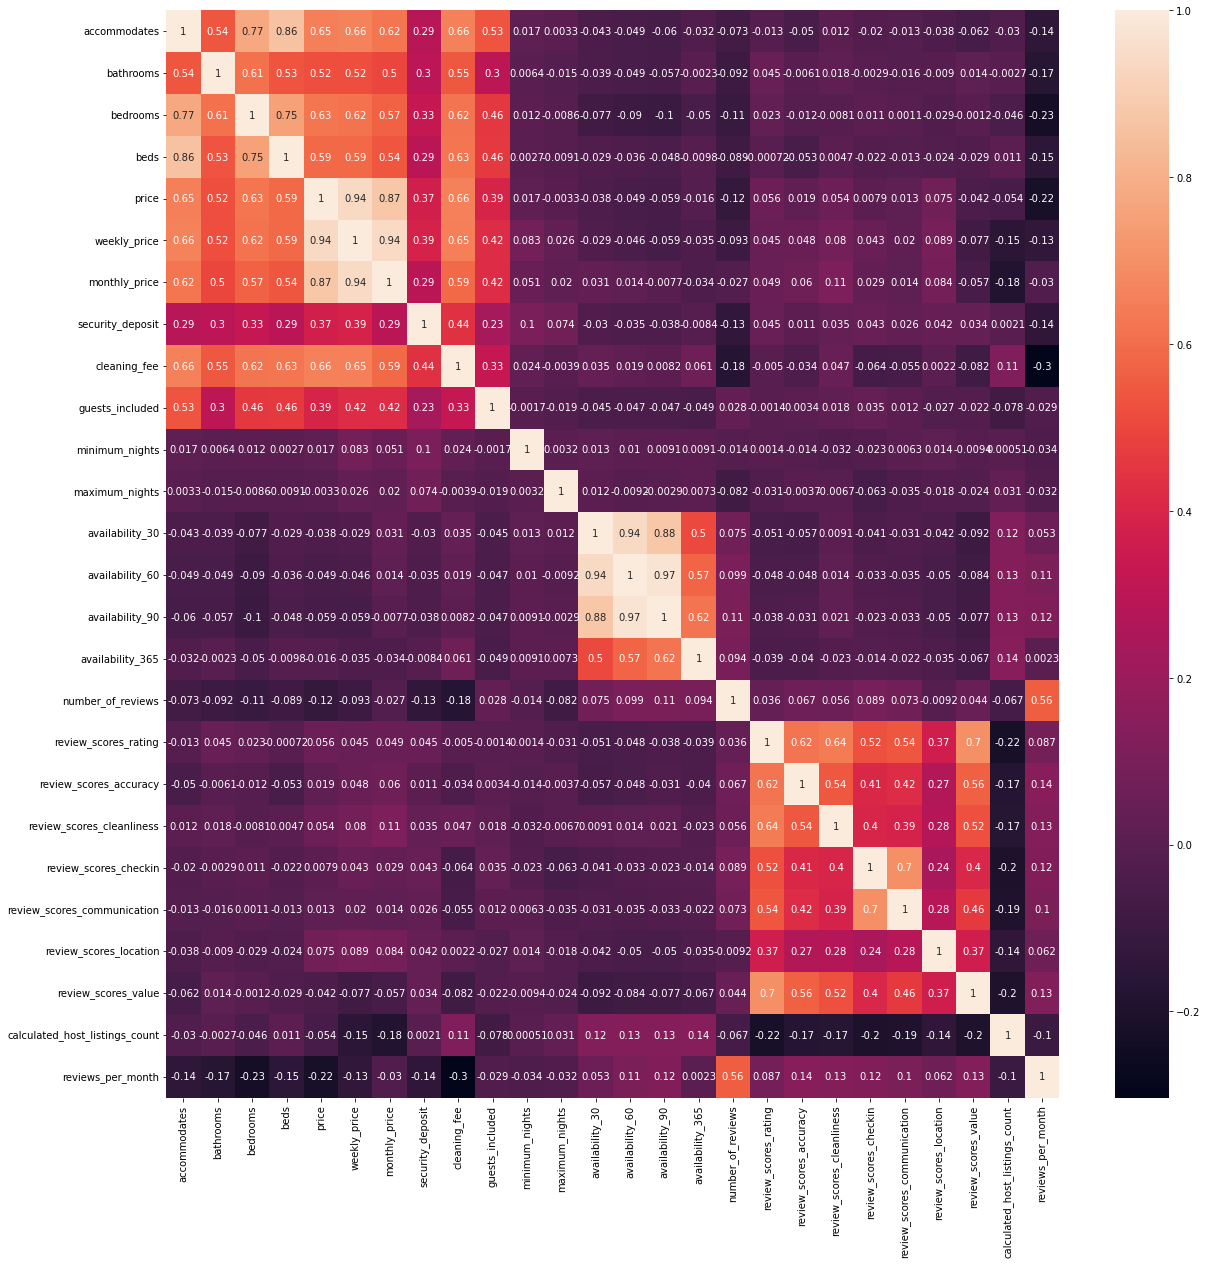

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(ls_numeric.corr(), annot= True)

We can see a strong positive correlation between accommodates with bedrooms and beds. and a moderate positive correlation between accommodates with bathrooms and price, cleaning_fee, guest_included. 

Secondly, we must remove the missing values.

In [50]:
ls_numeric.isnull().sum()[(ls_numeric.isnull().sum() / ls_numeric.shape[0])> 0.50 ]

monthly_price       2301
security_deposit    1952
dtype: int64

We can see that more than 50% of the variables monthly_price and security_deposit are having missing values, and these variables are critical in deciding our target variables.
hence we have to eliminate (drop) the rows which have the missing values 

In [24]:

ls_numeric=ls_numeric.dropna(axis=0)
ls_numeric

,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
1,4,1.0,1.0,1.0,150.0,1000.0,3000.0,100.0,40.0,1,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48
9,4,1.0,1.0,1.0,150.0,1000.0,3000.0,100.0,40.0,1,...,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,6,1.55
11,2,1.0,1.0,1.0,99.0,800.0,2000.0,500.0,150.0,1,...,8,97.0,10.0,10.0,9.0,10.0,10.0,9.0,1,0.98
12,4,1.0,2.0,3.0,245.0,1575.0,5800.0,300.0,95.0,1,...,13,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.92
32,4,3.0,3.0,2.0,175.0,699.0,2388.0,200.0,80.0,1,...,8,88.0,9.0,9.0,9.0,9.0,10.0,9.0,1,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,2,1.0,1.0,1.0,85.0,600.0,2250.0,100.0,40.0,1,...,11,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.48
3793,4,1.0,0.0,2.0,109.0,725.0,2895.0,200.0,55.0,4,...,78,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,4.28
3799,2,1.0,1.0,1.0,65.0,375.0,1400.0,150.0,25.0,1,...,5,95.0,10.0,9.0,10.0,10.0,10.0,10.0,1,1.06
3801,2,1.0,1.0,1.0,108.0,700.0,2500.0,200.0,45.0,2,...,28,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.05


Now after we removed all the missing values, the number of rows has decreased.

In [25]:
#Split into explanatory and response variables
x= ls_numeric[['bedrooms', 'beds', 'bathrooms', 'cleaning_fee', 'guests_included', 'price']]
y= ls_numeric['accommodates']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .40, random_state= 42)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

lm_model = LinearRegression() # Instantiate
lm_model.fit(x_train, y_train) #Fit

#Predict and score the model
y_test_preds = lm_model.predict(x_test) 
y_train_preds = lm_model.predict(x_train)

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
rsquared_score_train = r2_score(y_train, y_train_preds)
length_y_test = len(y_test)


print("The r-squared score for your model on test data was {} on {} values.".format(rsquared_score, length_y_test))
print("The r-squared score for your model on train data was {}.".format(rsquared_score_train))
(lm_model.coef_,lm_model.intercept_)


The r-squared score for your model on test data was 0.7405645477660406 on 284 values.
The r-squared score for your model on train data was 0.7764067135674512.


(array([0.40369213, 0.98466816, 0.04924225, 0.05851356, 0.28196599,
        0.24963436]),
 3.615023474178404)

We can see there's no huge difference between the R-squared of the test and train data. 

In [111]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(dtc,param_grid={'max_depth':[6,3,4,5,7],'max_leaf_nodes':[10,22,15,25], 'random_state':[22,30,24,]},cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'max_depth': 4, 'max_leaf_nodes': 22, 'random_state': 22}

In [112]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor(max_depth=4, random_state=22, max_leaf_nodes=22)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, )

dtc.fit(x_train,y_train)

#Predict and score the model
y_test_preds = dtc.predict(x_test) 
y_train_preds = dtc.predict(x_train)

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
rsquared_score_train = r2_score(y_train, y_train_preds)
length_y_test = len(y_test)


print("The r-squared score for your model on test data was {} on {} values.".format(rsquared_score, length_y_test))
print("The r-squared score for your model on train data was {}.".format(rsquared_score_train))



The r-squared score for your model on test data was 0.7444248260886488 on 142 values.
The r-squared score for your model on train data was 0.7905971045094311.


In [128]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth = 4, n_estimators = 6, random_state = 10)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state= 42)

rfr.fit(x_train,y_train)

#Predict and score the model
y_test_preds = rfr.predict(x_test) 
y_train_preds = rfr.predict(x_train)

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
rsquared_score_train = r2_score(y_train, y_train_preds)
length_y_test = len(y_test)


print("The r-squared score for your model on test data was {} on {} values.".format(rsquared_score, length_y_test))
print("The r-squared score for your model on train data was {}.".format(rsquared_score_train))


The r-squared score for your model on test data was 0.7905324593464035 on 142 values.
The r-squared score for your model on train data was 0.8190383036599859.


This is the best model we have, so we will save this model for our prediction as R-squared values of the test and train data are.

In [113]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(rfr,param_grid={'n_estimators':[10,12,15,20,25],'max_depth':[6,3,4,5,7],'random_state':[10,22,15,25]}, cv=5)
grid.fit(x_train,y_train)
grid.best_params_


{'max_depth': 6, 'n_estimators': 20, 'random_state': 10}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(rfr,param_grid={'max_depth':[6,3,4,5,7],'random_state':[10,22,15,25]})
grid.fit(x_train,y_train)
grid.best_params_

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=25, max_depth=3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state= 42)

gbr.fit(x_train,y_train)

#Predict and score the model
y_test_preds = gbr.predict(x_test) 
y_train_preds = gbr.predict(x_train)

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
rsquared_score_train = r2_score(y_train, y_train_preds)
length_y_test = len(y_test)


print("The r-squared score for your model on test data was {} on {} values.".format(rsquared_score, length_y_test))
print("The r-squared score for your model on train data was {}.".format(rsquared_score_train))

The r-squared score for your model on test data was 0.7856631161060397 on 142 values.
The r-squared score for your model on train data was 0.8176603964457232.


In [71]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=6)
knr.fit(x_train,y_train)

#Predict and score the model
y_test_preds = knr.predict(x_test) 
y_train_preds = knr.predict(x_train)

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
rsquared_score_train = r2_score(y_train, y_train_preds)
length_y_test = len(y_test)


print("The r-squared score for your model on test data was {} on {} values.".format(rsquared_score, length_y_test))
print("The r-squared score for your model on train data was {}.".format(rsquared_score_train))

The r-squared score for your model on test data was 0.40514821538993007 on 142 values.
The r-squared score for your model on train data was 0.6245161843957024.


# Question 2

Which type of room do the customers prefer?

In [58]:
def pivot_table(group,values):
    
    '''
    This is a function that creates the pivot table between any two variables of the data frame ls
    
    '''
    
    room_price= ls[[group,values]]
    price_per_room_type =room_price.groupby([group]).sum().sort_values(values, ascending=False)
    return price_per_room_type
group='room_type'
values='price'
pivot_table(group,values)


,price
room_type,
Entire home/apt,395998.0
Private room,87052.0
Shared room,5563.0


<AxesSubplot:xlabel='room_type'>

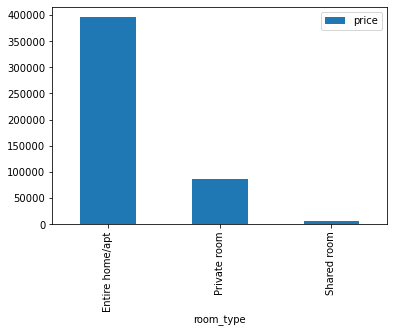

In [62]:
pivot_table(group,values).plot(kind='bar')

From the barplot, we can say that most of the customers prefer to have an entire home/apt rather than having a private or shared room.

# Question 3

Is the review scores rating affected by the cancellation policy?

In [77]:
reviews = ls[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

In [82]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_accuracy       3160 non-null   float64
 1   review_scores_cleanliness    3165 non-null   float64
 2   review_scores_checkin        3160 non-null   float64
 3   review_scores_communication  3167 non-null   float64
 4   review_scores_location       3163 non-null   float64
 5   review_scores_value          3162 non-null   float64
dtypes: float64(6)
memory usage: 179.1 KB


In [79]:
reviews.head()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,10.0,10.0,10.0,10.0,9.0,10.0
1,10.0,10.0,10.0,10.0,10.0,10.0
2,10.0,10.0,10.0,10.0,10.0,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,9.0,9.0,10.0,10.0,9.0,9.0


In [80]:
reviews.dropna()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,10.0,10.0,10.0,10.0,9.0,10.0
1,10.0,10.0,10.0,10.0,10.0,10.0
2,10.0,10.0,10.0,10.0,10.0,10.0
4,9.0,9.0,10.0,10.0,9.0,9.0
5,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...
3810,9.0,8.0,10.0,10.0,10.0,8.0
3811,9.0,8.0,10.0,10.0,10.0,10.0
3812,10.0,10.0,10.0,10.0,9.0,10.0
3813,8.0,10.0,4.0,8.0,10.0,8.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_accuracy       3160 non-null   float64
 1   review_scores_cleanliness    3165 non-null   float64
 2   review_scores_checkin        3160 non-null   float64
 3   review_scores_communication  3167 non-null   float64
 4   review_scores_location       3163 non-null   float64
 5   review_scores_value          3162 non-null   float64
dtypes: float64(6)
memory usage: 179.1 KB


In [83]:
reviews.isnull().sum()

review_scores_accuracy         658
review_scores_cleanliness      653
review_scores_checkin          658
review_scores_communication    651
review_scores_location         655
review_scores_value            656
dtype: int64

In [84]:
reviews.dropna(inplace=True)

C:\Users\May\AppData\Local\Temp\ipykernel_24788\2872532949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews.dropna(inplace=True)


In [85]:
reviews.isnull().sum()

review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

we can see there's no more missing values.

,cancellation_policy,review_scores_rating
0,moderate,95.0
1,strict,96.0
2,strict,97.0
3,flexible,NaN
4,strict,92.0
...,...,...
3813,strict,80.0
3814,moderate,100.0
3815,moderate,NaN
3816,moderate,NaN


In [111]:
data.dropna(axis=0)

,cancellation_policy,review_scores_rating
0,moderate,95.0
1,strict,96.0
2,strict,97.0
4,strict,92.0
5,strict,95.0
...,...,...
3810,strict,92.0
3811,moderate,100.0
3812,moderate,96.0
3813,strict,80.0


<AxesSubplot:xlabel='cancellation_policy', ylabel='review_scores_rating'>

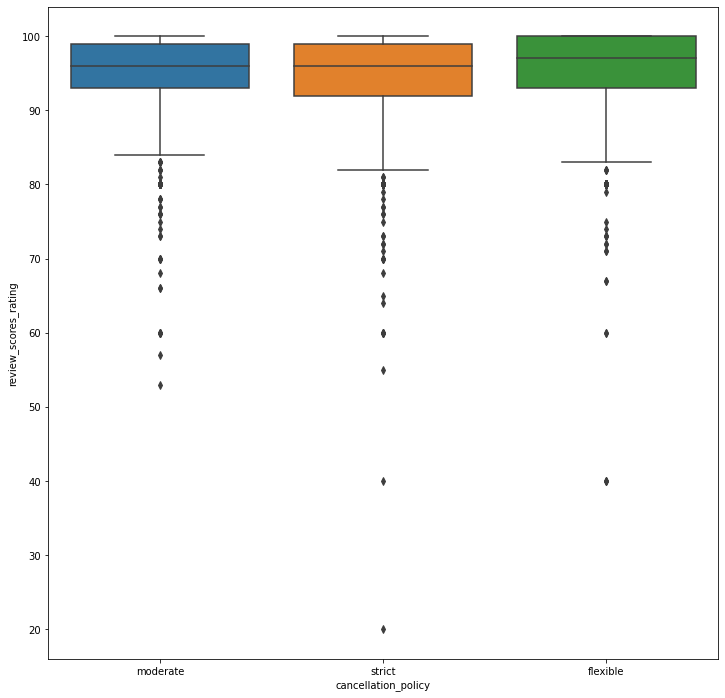

In [112]:
plt.figure(figsize=(12,12))
sns.boxplot(x='cancellation_policy', y='review_scores_rating',data=data)

From the boxplot, we can see that the more the cancellation policy is flexible, the higher the review score we will get. strict cancellation policy leads to lower review scores, from the outliers we can see one of the review scores was 20 out of 100 and it's for a strict cancellation policy.

# Question 4

What is the most common type of property to rent?

In [6]:
ld=ls['property_type'].value_counts()
ld

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

<AxesSubplot:ylabel='property_type'>

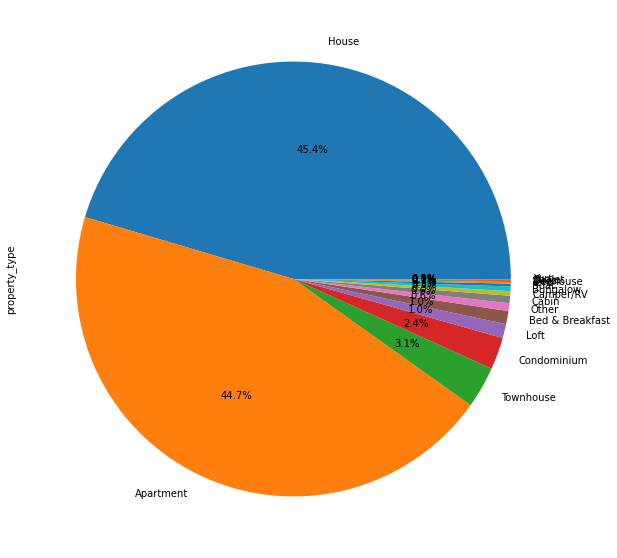

In [73]:
plt.figure(figsize=(10,10))
ls['property_type'].value_counts().plot.pie(autopct='%1.1f%%')

We can see from the pie chart that 45.4% of the property's rent is of house type and 44.7% of apartment type.

In [ ]:
def 